Using TensorFlow Keras to train a regression model, linear and nonlinear with deep neural network. The World Nations databse from dataCamp platform was queried with SQL to extract population data and numer of languages for countries in Europe. I trained a model with one and multiple variables.  

In [ ]:
import pandas as pd
import os
from google.colab import drive
drive.mount('/content/drive')

#print(os.getcwd())
print(os.listdir(os.getcwd()))
print(os.listdir("drive/MyDrive/data_science_project/"))
#os.chdir('/)
# Load dataset
df_country_languages = pd.read_csv('drive/MyDrive/datalab_export_2025-02-03 18_11_35.csv')  # Adjust the filename if needed

# Display first few rows
print(df_country_languages.head())

# Check column names
print(df_country_languages.columns)

Mounted at /content/drive
['.config', 'drive', 'sample_data']
['population_numlg.png', 'loss_lin_onevar.png', 'pop_language_linearPredict.png']
   index  country continent  year  population  number_of_languages  year_index
0      0  Albania    Europe  2018     2866376                    3           1
1      1  Andorra    Europe  2018       77006                    4           1
2      2  Austria    Europe  2018     8847037                    8           1
3      3  Belarus    Europe  2018     9485386                    4           1
4      4  Belgium    Europe  2018    11422068                    6           1
Index(['index', 'country', 'continent', 'year', 'population',
       'number_of_languages', 'year_index'],
      dtype='object')


In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import plotly.io as pio

In [ ]:
# Import libraries
#plot the data
import pandas as pd
import plotly.express as px

# Create scatter plot
fig = px.scatter(
    df_country_languages,
    x="population",
    y="number_of_languages",
    color="country",
    hover_name="country",
    log_x=True,
)

# Create labels and show plot
fig.update_layout(
    title="Number of Languages Spoken in a Country by Population",
    #<sup>Interactive Chart</sup>",
    title_x=0.5,
    xaxis_title="Population (Log)",
    yaxis_title="Number of Languages",
    legend_title="Country",
    template="plotly_dark",
)

fig.show()
#fig.write_image("drive/MyDrive/data_science_project/population_numlg.png")
df_country_languages.tail()

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


In [ ]:
pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.4 MB/s eta 0:00:00


In [ ]:
df.year.unique()

NameError: name 'df' is not defined

[link text](https://)#

In [ ]:
import numpy as np
import seaborn as sns

# Select relevant columns
df = df_country_languages[['population', 'number_of_languages', 'year']].dropna()

#the year is categorical variable.
# Encode categorical values.
df = pd.get_dummies(df, columns=['year'], prefix='year_', prefix_sep='', dtype=float)
df.tail()

#print(encoded_year.numpy())
#print(df.head)

# Log-transform population to handle large scale differences
df['log_population'] = np.log1p(df['population'])

#split into train and test data.
train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)

##joint distribution exploration.
#sns.pairplot(train_dataset[['number_of_languages', 'population','year_2016', "year_2017", "year_2018"]], diag_kind='kde')

#check statistics
train_dataset.describe()

##Split the data into training and test, with features and labels separately.
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('number_of_languages')
test_labels = test_features.pop('number_of_languages')

# Define features (X) and target (y)
#X_train = df[['log_population']].values
#y_train = df['number_of_languages'].values

# Normalize X (optional but recommended)
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)
#print(X_scaled)

In [ ]:
df.tail()

,population,number_of_languages,year_2016,year_2017,year_2018,log_population
36,46723749,4,0.0,0.0,1.0,17.659763
37,10183175,6,0.0,0.0,1.0,16.136248
38,8516543,4,0.0,0.0,1.0,15.957521
39,44622516,7,0.0,0.0,1.0,17.613749
40,66488991,3,0.0,0.0,1.0,18.012547


In [19]:
#Add a normalization layer, to normalize the features, with keras normalize.
normalizer = tf.keras.layers.Normalization(axis=-1)

#apply the normalization to training features, to hold the mean and sd.
normalizer.adapt(np.array(train_features))
#print(normalizer.mean.numpy())

#first = np.array(train_features[:1], dtype=np.float32)  # Ensure it's in float32

#when applied to the first row
first = np.array(train_features[:1])
print(normalizer(first).numpy())
print(train_features[:1])


[[-0.56276965 -0.17677669 -0.25400025  0.31622767 -0.99836975]]
    population  year_2016  year_2017  year_2018  log_population
25      483530        0.0        0.0        1.0       13.088871


In [20]:
#Linear regression with one variable.
#the population.
population = np.array(train_features['population'])

#add the normalization layer.
population_normalizer = layers.Normalization(input_shape=[1,], axis=None)
population_normalizer.adapt(population)

#bild a sequential model
population_model = tf.keras.Sequential([
    population_normalizer,
    layers.Dense(units=1)
])

population_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_3 (Normalization)      │ (None, 1)                   │               3 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5 (24.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 3 (16.00 B)

In [21]:
#define the optimization function - minimize the mean absolute error.
population_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

#fit the model, 100 epochs.

history = population_model.fit(
    train_features['population'],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)


In [23]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

def plot_loss(history):
    plt.figure(figsize=(8, 6))  # Optional: Set figure size
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)

    # Save the plot
    plt.savefig('drive/MyDrive/data_science_project/loss_lin_onevar.png')
    plt.show()  # Show the plot (optional)

# Call the function
#plot_loss(history)

In [ ]:
#evaluate the model, apply the model on the test set.
#the error on the test data set.

test_results = {}

test_results['population_model'] = population_model.evaluate(
    test_features['population'],
    test_labels, verbose=0)

print(test_results)


{'population_model': 1.3499233722686768}


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
[[3.866552 ]
 [4.0292892]
 [3.9687781]
 [3.9386165]
 [5.281862 ]
 [3.7970045]
 [3.8110204]
 [4.8931823]]


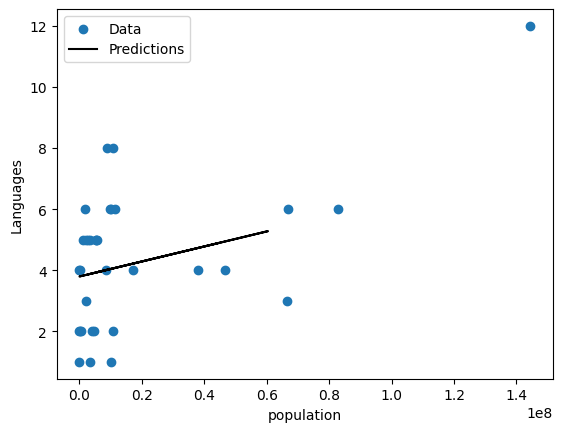

In [ ]:
##visualize how the training data looks and how the model prediction look on the test data set.

x = test_features['population']
y = population_model.predict(x)
#x = x.numpy()  # if x is a tensor
print(y)
#print(x,y)
def plot_population(x, y):
  plt.scatter(train_features['population'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('population')
  plt.ylabel('Languages')
  plt.legend()
  plt.savefig('drive/MyDrive/data_science_project/pop_language_linearPredict.png')
  plt.show()

plot_population(x, y)

In [ ]:
print(x)
print(y)

0      2866376
3      9485386
6      7024216
9      5797446
19    60431283
21       37658
23      607728
39    44622516
Name: population, dtype: int64
[[3.8964293]
 [4.056162 ]
 [3.9967678]
 [3.9671628]
 [5.2856073]
 [3.8281655]
 [3.8419228]
 [4.904104 ]]


In [24]:
##Linear regression with multiple variables.
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

linear_model.predict(train_features[:10])
linear_model.layers[1].kernel

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


<Variable path=sequential_3/dense_3/kernel, shape=(5, 1), dtype=float32, value=[[ 0.44402838]
 [-0.26862478]
 [-0.227947  ]
 [ 0.34351707]
 [-0.594543  ]]>

In [25]:
#configure and train the model.
linear_model.compile(
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    loss='mean_absolute_error')


history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

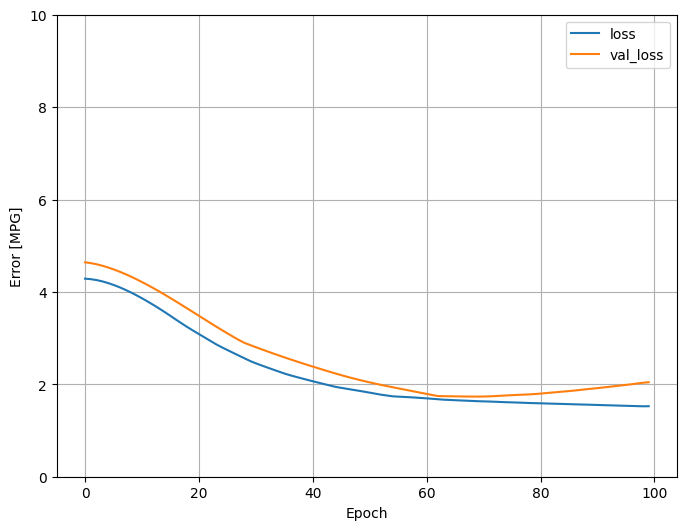

{'population_model': 1.3499233722686768, 'linear_model': 1.4130675792694092}


In [27]:
plot_loss(history)

print(test_results)
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)



In [29]:
#Regression model with deep neural network.
#One reason here is the non-negative output variables we are trying to predict, number of languages.
#One input variable

#normalization layer,
#then adding two non-linear relu layers,
#and one linear single output layer

def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

#try multiple optimizers,
#optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
#optimizer=tf.keras.optimizers.Adam(0.001) used for large datasets.
  model.compile(loss='mean_absolute_error', optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9))
  return model


In [31]:
#build the model

dnn_population_model = build_and_compile_model(population_normalizer)

dnn_population_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_3 (Normalization)      │ (None, 1)                   │               3 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,356 (17.02 KB)

 Trainable params: 4,353 (17.00 KB)

 Non-trainable params: 3 (16.00 B)

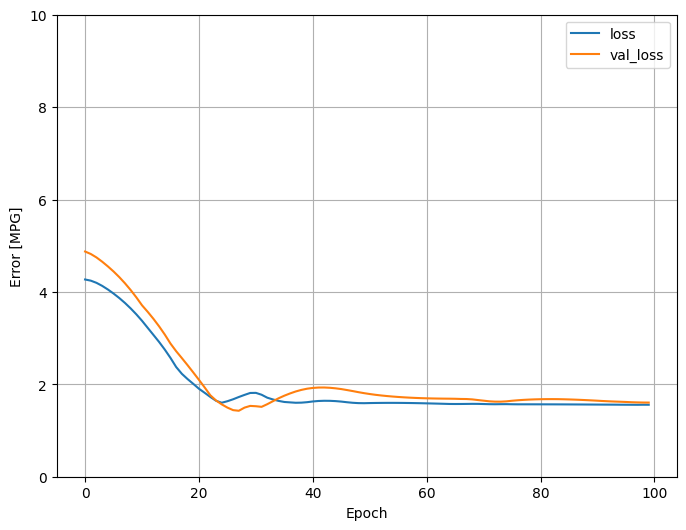

In [32]:

def plot_loss(history):
    plt.figure(figsize=(8, 6))  # Optional: Set figure size
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)

    # Save the plot
    plt.savefig('drive/MyDrive/data_science_project/loss_dnn_onevar.png')
    plt.show()  # Show the plot (optional)


#train the model

history = dnn_population_model.fit(
    train_features['population'],
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

##plot the loss function again
plot_loss(history)

In [33]:
#add to the test results.

test_results['dnn_population_model'] = dnn_population_model.evaluate(
    test_features['population'], test_labels,
    verbose=0)

print(test_results)

{'population_model': 1.3499233722686768, 'linear_model': 1.4130675792694092, 'dnn_population_model': 1.464742660522461}
